# Declaraciones anidadas y alcance

Ahora que hemos repasado la escritura de nuestras propias funciones, es importante entender cómo Python maneja los nombres de variables que usted asigna. Cuando crea un nombre de variable en Python, el nombre se almacena en un *espacio de nombre*. Los nombres de variable también tienen un *alcance*, el alcance determina la visibilidad de ese nombre de variable para otras partes de su código.

Comencemos con un experimento mental rápido; imagina el siguiente código:

In [1]:
x = 25

def printer():
    x = 50
    return x

# print(x)
# print(printer())

¿Cuál imagina que es la salida de la impresión de printer()? ¿25 o 50? ¿Cuál es la salida de la impresión de x? ¿25 o 50?

In [2]:
print(x)

25


In [3]:
print(printer())

50


¡Interesante! Pero, ¿cómo sabe Python a qué **x** te refieres en tu código? Aquí es donde entra la idea de alcance. Python tiene un conjunto de reglas que sigue para decidir qué variables (como **x** en este caso) estás haciendo referencia en tu código. Analicemos las reglas:

Es muy importante comprender esta idea de alcance en su código para poder asignar y llamar correctamente los nombres de las variables.

En términos simples, la idea de alcance se puede describir mediante 3 reglas generales:

1. Las asignaciones de nombres crearán o cambiarán los nombres locales de forma predeterminada.
2. Búsqueda de referencias de nombre (como máximo) cuatro ámbitos, estos son:
    * Locales(L)
    * Incluidas(E)
    * Globales(G)
    * Integrales(B)
3. Los nombres declarados en declaraciones globales y no locales asignan nombres asignados a los ámbitos de módulo y función adjuntos.


La declaración en el n. ° 2 anterior puede definirse mediante la regla LEGB.

**Regla LEGB:**

L: Variables Locales: nombres asignados de alguna manera dentro de una función (def o lambda) y no declarados globales en esa función.

E: Variables Incluidas: nombres en el ámbito local de todas y cada una de las funciones adjuntas (def o lambda), desde el interior al exterior.

G: Variables Globales (módulo): nombres asignados en el nivel superior de un archivo de módulo o declarados globales en una def dentro del archivo.

B: Variables Integrales (Python) - Nombres preasignados en el módulo de nombres incorporado: open, range, SyntaxError, ...

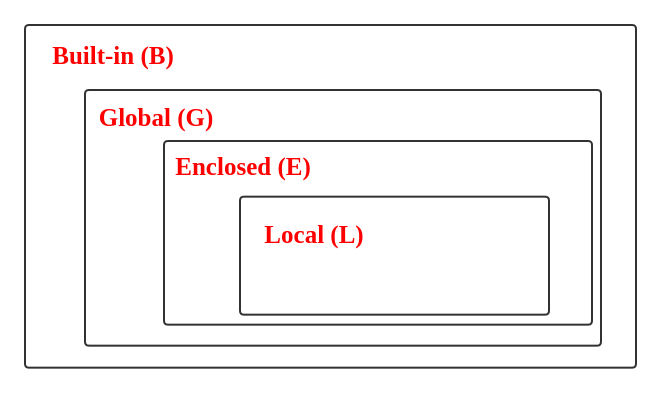

## Ejemplos rápidos de la regla LEGB

### Variables Locales (L)

In [4]:
# x es una variable local aquí:
f = lambda x:x**2

### Variables Incluidas (E)
Esto ocurre cuando tenemos una función dentro de una función (funciones anidadas)

In [5]:
name = 'This is a global name'

def greet():
    # Función de cierre
    name = 'Sammy'
    
    def hello():
        print('Hello '+ name)
    
    hello()

greet()

Hello Sammy


Observe cómo se usó Sammy, ¡porque la función hello() estaba incluida dentro de la función greet()!

### Variables Globales G)
Afortunadamente en Jupyter una forma rápida de probar las variables globales es ver si otra celda reconoce la variable.

In [6]:
print(name)

This is a global name


### Variables Integrales (B)
Estos son los nombres de funciones incorporados en Python (¡no los sobrescribas!)

In [7]:
len

<function len>

## Variables Locales 
Cuando declaras variables dentro de una definición de función, no están relacionadas de ninguna manera con otras variables con los mismos nombres usados ​​fuera de la función, es decir, los nombres de las variables son locales a la función. A esto se le llama el alcance de la variable. Todas las variables tienen el alcance del bloque en el que se declaran a partir del punto de definición del nombre.

Ejemplo:

In [8]:
x = 50

def func(x):
    print('x is', x)
    x = 2
    print('Changed local x to', x)

func(x)
print('x is still', x)

x is 50
Changed local x to 2
x is still 50


La primera vez que imprimimos el valor de la variable **x** con la primera línea en el cuerpo de la función, Python usa el valor del parámetro declarado en el bloque principal, arriba de la definición de la función.

A continuación, asignamos el valor 2 a **x**. La varable **x** es local a nuestra función. Entonces, cuando cambiamos el valor de **x** en la función, la **x** definida en el bloque principal no se ve afectada.

Con la última declaración de impresión, mostramos el valor de **x** como se define en el bloque principal, confirmando así que en realidad no se ve afectado por la asignación local dentro de la función previamente llamada.

## La declaración <code>global</code> 
Si desea asignar un valor a un nombre definido en el nivel superior del programa (es decir, no dentro de ningún tipo de alcance, como funciones o clases), entonces debe decirle a Python que el nombre no es local, pero es global. . Hacemos esto usando la declaración <code> global </code>. Es imposible asignar un valor a una variable definida fuera de una función sin la declaración global.

Puede utilizar los valores de dichas variables definidas fuera de la función (asumiendo que no hay ninguna variable con el mismo nombre dentro de la función). Sin embargo, esto no se recomienda y debe evitarse, ya que al lector del programa no le queda claro dónde está la definición de esa variable. El uso de la instrucción <code> global </code> deja muy claro que la variable está definida en un bloque más externo.

Ejemplo:

In [1]:
x = 50

def func():
    global x
    print('¡Esta función esta usando ahora la x global!')
    print('Porque la x global es', x)
    x = 2
    print('Se ejecuto func(), la x global cambio por: ', x)

print('Antes de llamar a func(), x es: ', x)
func()
print('El valor de x (fuera de func()) es: ', x)

Antes de llamar a func(), x es:  50
¡Esta función esta usando ahora la x global!
Porque la x global es 50
Se ejecuto func(), la x global cambio por:  2
El valor de x (fuera de func()) es:  2


La declaración <code>global</code> se usa para declarar que la variable **x** es una variable global; por lo tanto, cuando asignamos un valor a la variable **x** dentro de la función, ese cambio se refleja cuando usamos el valor de **x** en el bloque principal.

Se puede especificar más de una variable global usando la misma declaración global, p. Ej. <code>x, y, z</code> globales.